In [1]:
from src import functions as fn

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global Variables
stock_name = 'amd' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 3 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'aapl': '12/12/1980' # Updated 11/8/21 1D, 3D, 5D ahead
               #, 'acy': '01/18/1998' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 11/8/21 1D, 3D, 5D ahead
               #, 'alb': '02/21/1994' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amat': '03/16/1980' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 11/23/21 1D, 3D, 5D ahead
               , 'amgn': '06/13/1983' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amzn': '05/12/1997' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'bby': '04/15/1985' # Updated 11/19/21 1D, 3D, 5D ahead
               #, 'bpmc': '04/27/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'crsp': '10/16/2016' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'cost': '07/07/1986' # Updated 11/23/21 1D, 3D, 5D ahead
               , 'dis': '10/27/2014' # Updatd 11/5/21 1D, 3D, 5D ahead
               #, 'dq': '10/04/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'fslr': '11/12/2006' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 11/8/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 11/21/21 1D, 3D, 5D ahead
               , 'll': '11/05/2007' # Updated 11/22/21 1D, 3D, 5D ahead
               , 'lng': '04/04/1994' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'mdb': '10/15/2017' # Updated 11/21/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 11/8/21 1D, 3D, 5D ahead
               , 'mu': '05/28/1984' # Updated 11/20/21 1D, 3D, 5D ahead
               #, 'nee': '02/19/1973' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 11/17/21 1D, 3D, 5D ahead
               #, 'pacb': '10/25/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'qgen': '06/24/1996' # Updated 4/26/21 1D, 3D, 5D ahead
               #, 'run': '08/02/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'okta': '04/03/2017' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'orcl': '03/10/1986' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'qcom': '12/09/1991' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'qqq': '03/08/1999' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'srpt': '06/02/1997' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'tgt': '02/19/1973' # Updated 11/22/21 1D, 3D, 5D ahead
               #, 'tpic': '07/17/2016' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'tsm': '10/06/1997' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 11/22/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'wmt': '11/10/2014' # Updated 11/16/21 1D, 3D, 5D ahead
               , 'xlk': '12/21/1998' # Updated 11/21/21 1D, 3D, 5D ahead
              }

In [4]:
from datetime import date, datetime
today = date.today()
print("Today's date:", today)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Start Time: ", current_time)

fn.get_tables(start_dates)
print('Table Updates Complete')

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current End Time: ", current_time)

Today's date: 2022-01-26
Current Start Time:  00:00:54
Table Updates Complete
Current End Time:  00:01:17


In [5]:
len(start_dates)

45

In [6]:
import itertools as itr
start_dates1 = dict(itr.islice(start_dates.items(), 0, 15))
start_dates1

{'a': '11/15/1999',
 'aapl': '12/12/1980',
 'adbe': '08/11/1986',
 'amat': '03/16/1980',
 'amd': '03/17/1980',
 'amgn': '06/13/1983',
 'amzn': '05/12/1997',
 'baba': '09/15/2014',
 'bac': '02/19/1973',
 'bby': '04/15/1985',
 'crm': '06/23/2004',
 'crsp': '10/16/2016',
 'cost': '07/07/1986',
 'dis': '10/27/2014',
 'esgv': '09/16/2018'}

In [7]:
start_dates2 = dict(itr.islice(start_dates.items(), 15, 30))
start_dates2

{'fslr': '11/12/2006',
 'goog': '08/16/2004',
 'ibm': '01/02/1962',
 'intc': '03/16/1980',
 'iyw': '05/15/2000',
 'll': '11/05/2007',
 'lng': '04/04/1994',
 'ma': '05/21/2006',
 'mdb': '10/15/2017',
 'msft': '03/10/1986',
 'mu': '05/28/1984',
 'nio': '09/10/2018',
 'nvda': '01/22/1999',
 'pypl': '07/05/2015',
 'qgen': '06/24/1996'}

In [8]:
start_dates3 = dict(itr.islice(start_dates.items(), 30, 45+1))
start_dates3

{'okta': '04/03/2017',
 'orcl': '03/10/1986',
 'qcom': '12/09/1991',
 'qqq': '03/08/1999',
 'srpt': '06/02/1997',
 'tgt': '02/19/1973',
 'tsla': '06/29/2010',
 'tsm': '10/06/1997',
 'v': '03/16/2008',
 'vbiv': '09/04/2002',
 'vbr': '01/26/2004',
 'viov': '09/06/2010',
 'vgt': '01/26/2004',
 'wmt': '11/10/2014',
 'xlk': '12/21/1998'}

In [9]:
# import timeit
# from datetime import datetime, date
# today = date.today()
# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Gridsearch Start Date: ", today)
# print("Current Time: ", current_time)

#Train 15 at a time!
# stocks = [x for x in start_dates1]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Next on training for Saturday 4/17/2021
# stocks = [x for x in start_dates2]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Next on training for Saturday 4/17/2021
# stocks = [x for x in start_dates3]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Train all, takes 15+ hours, trained 2021-12-20
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df, _ = fn.data(stock, start_dates[stock], days)
#         %timeit fn.rfc_GridSearch(X_train, y_train, stock, days, cv)
        
# len(stocks)

# Train desired stocks...takes less time (4 will take 15.5 hours, each stock is roughly 2.5-4 hours to train)
# 3 will take 7.5 hours, roughly 2.5 hours per stock trained
# to train: ['cost']

# stocks = ['vgt']
#  [##'a', # one '#' means wanted trained, two '##' means unwanted untrained
#           #'aapl'
#           #, 'adbe'
#           #, 'amat'
#           ##, 'amgn'
#           #, 'baba'
#           ##, 'bac'
#           #, 'bby'
#           #, 'crm'
#           ##, 'crsp'
#           #, 'dis'
#           #, 'esgv'
#           ##, 'fslr'
#           #, 'goog'
#           #, 'ibm'
#           #, 'intc'
#           , 'iyw'
#           #, 'll'
#           ##, 'lng'
#           ##, 'ma'
#           , 'mdb'
#           , 'msft'
#           , 'mu'
#           ##, 'nio'
#           , 'nvda'
#           , 'pypl'
#           ##, 'qgen'
#           ##, 'okta'
#           , 'orcl'
#           , 'qcom'
#           , 'qqq'
#           ##, 'srpt'
#           , 'vbiv'
#           #, 'vbr'
#           , 'wmt'
#           , 'xlk'
#          ] 
# days_ahead = [1, 3, 5] 
# cv = 3 # was 5 
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df, _ = fn.data(stock, start_dates[stock], days)
#         %timeit fn.rfc_GridSearch(X_train, y_train, stock, days, cv)

# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Gridsearch End Date: ", today)
# print("Current Time: ", current_time)

Buy amzn 1 day(s) ahead
Model Returns (x 100 for %): 1.0035
Stock Returns (x 100 for %): 233.5315


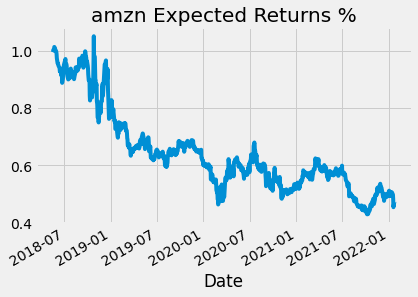

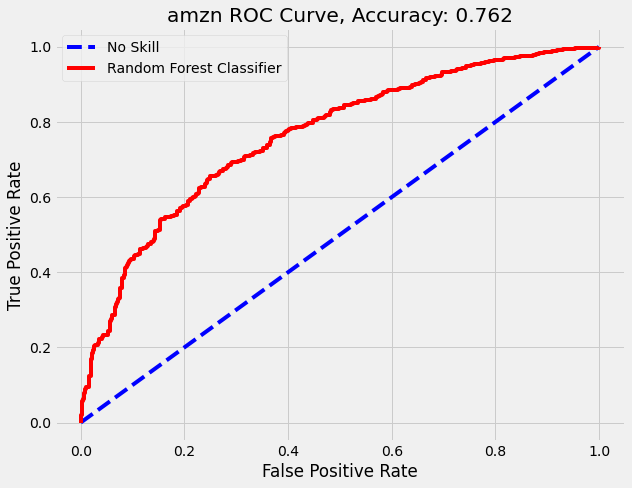

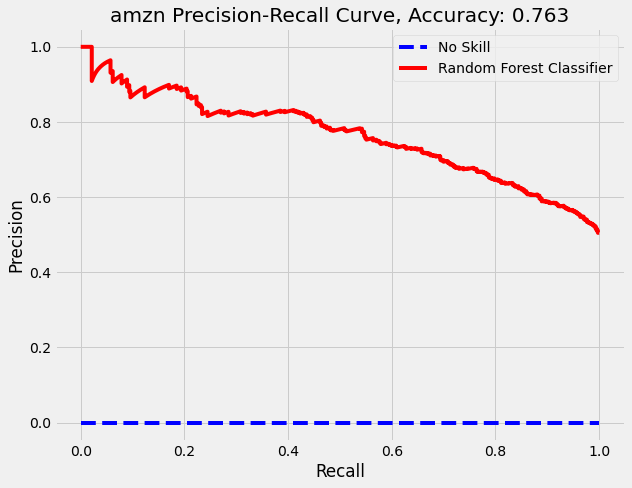

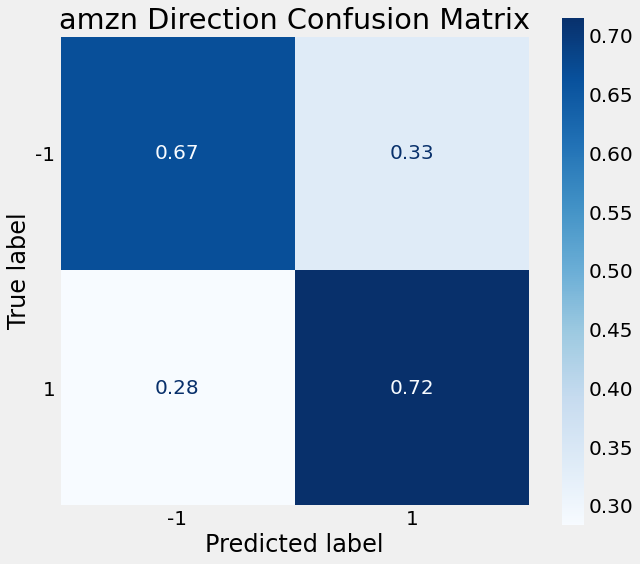

In [10]:
stock_name = 'amzn'
fn.all_func(stock_name
           , start_dates[stock_name]
           , days_ahead = 1
           , model_name = model_name
           , days_back = 1
          )

In [11]:
print("Today's date:", today)
print("Current Time =", current_time)

Today's date: 2022-01-26
Current Time = 00:01:17


In [12]:
summary_df = fn.pred_summary_df(start_dates1, stocks = [x for x in start_dates1], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,a,134.570007,Buy,2.1879,Buy,1.9922,Buy,2.2327,13.3167
1,aapl,159.779999,Buy,3.2288,Hold or Sell,4.7229,Buy,4.7152,678.9903
2,adbe,502.720001,Buy,3.9526,Buy,4.8791,Buy,3.7907,134.0905
3,amat,132.990005,Buy,7.7200,Buy,9.8135,Buy,9.9076,1104.5718
4,amd,111.129997,Buy,22.2720,Buy,22.0068,Buy,25.4403,14.4616
5,amgn,225.039993,Hold or Sell,2.0216,Hold or Sell,2.0315,Hold or Sell,1.7061,359.4885
6,amzn,2799.719971,Buy,0.9110,Buy,0.9546,Buy,1.2175,233.5315
7,baba,119.139999,Buy,0.7547,Buy,0.5847,Buy,0.5948,0.4902
8,bac,45.430000,Hold or Sell,2.5316,Hold or Sell,2.2372,Hold or Sell,1.9352,60.9760
9,bby,98.029999,Buy,1.5429,Buy,1.5094,Buy,1.8585,689.8453


In [13]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(2.166, 1.9922, 1.8585, 60.976)

In [14]:
summary_df = fn.pred_summary_df(start_dates2, stocks = [x for x in start_dates2], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,fslr,75.940002,Hold or Sell,1.7964,Hold or Sell,2.0344,Hold or Sell,1.7003,-0.4447
1,goog,2534.709961,Buy,2.4186,Buy,2.9541,Buy,2.4384,9.7947
2,ibm,136.100006,Hold or Sell,1.3335,Hold or Sell,1.3351,Hold or Sell,1.1962,32.2922
3,intc,51.000000,Buy,3.9354,Buy,3.7698,Buy,3.7870,231.6884
4,iyw,98.760002,Buy,1.9921,Buy,2.4929,Buy,1.7475,8.9918
5,ll,14.510000,Hold or Sell,0.6259,Hold or Sell,0.5388,Hold or Sell,0.8220,-0.3891
6,lng,109.879997,Hold or Sell,1.6394,Hold or Sell,2.0654,Hold or Sell,1.6574,25.3697
7,ma,338.760010,Buy,1.2827,Buy,1.4385,Buy,1.4782,27.6193
8,mdb,365.480011,Buy,0.7221,Buy,1.0824,Buy,0.9224,5.9076
9,msft,288.489990,Buy,7.0605,Buy,6.0776,Buy,7.4831,271.4744


In [15]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.6394, 2.0344, 1.6574, 9.7947)

In [16]:
summary_df = fn.pred_summary_df(start_dates3, stocks = [x for x in start_dates3], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,okta,177.660004,Buy,0.8470,Buy,0.8299,Buy,0.8241,4.7701
1,orcl,81.070000,Buy,2.1892,Buy,2.2657,Buy,2.4195,419.9220
2,qcom,165.449997,Buy,3.4235,Buy,1.8831,Buy,3.2781,86.5711
3,qqq,345.109985,Buy,1.7861,Buy,1.8275,Hold or Sell,1.9130,16.4670
4,srpt,68.709999,Hold or Sell,1.2373,Hold or Sell,1.1161,Hold or Sell,0.7168,1.3491
5,tgt,214.679993,Buy,1.8896,Buy,2.7664,Buy,2.7456,447.3629
6,tsla,918.400024,Buy,2.7068,Hold or Sell,3.2069,Buy,3.2031,137.4801
7,tsm,122.480003,Buy,3.6248,Buy,5.7384,Buy,5.4082,23.7669
8,v,202.000000,Buy,1.5945,Hold or Sell,1.5517,Hold or Sell,1.4731,9.2268
9,vbiv,1.730000,Buy,2.5881,Buy,3.8042,Hold or Sell,2.3735,-0.9497


In [17]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.8896, 1.8831, 1.7929, 11.7241)